<h3> Working with dates </h3>

In [8]:
import pandas as pd
from datetime import datetime

In [2]:
eth_df = pd.read_csv('ethereumprice_org.csv')

In [4]:
eth_df.head()

,timestamp,open,high,low,close
0,1623542400,2370.724416,undefined,undefined,undefined
1,1623456000,2354.813968,2447.568010857967,2261.86707542377,2367.97618080739
2,1623369600,2470.997379,2495.12396019085,2322.617204110257,2352.675589833701
3,1623283200,2610.633938,2621.5144645105865,2433.3857468413585,2470.4736784482952
4,1623196800,2509.048145,2623.7007639183257,2409.4014825151694,2607.626355089492


In [14]:
# convert timestamp to datetime string
eth_df['timestamp'] = eth_df['timestamp'].apply(lambda x: datetime.strftime(datetime.fromtimestamp(x), '%Y-%m-%d %I:%M %p'))

In [17]:
# method to convert time strings to datetime objects 
eth_df['timestamp'] = pd.to_datetime(eth_df['timestamp'], format='%Y-%m-%d %I:%M %p')

In [18]:
eth_df.head()

,timestamp,open,high,low,close
0,2021-06-13 05:30:00,2370.724416,undefined,undefined,undefined
1,2021-06-12 05:30:00,2354.813968,2447.568010857967,2261.86707542377,2367.97618080739
2,2021-06-11 05:30:00,2470.997379,2495.12396019085,2322.617204110257,2352.675589833701
3,2021-06-10 05:30:00,2610.633938,2621.5144645105865,2433.3857468413585,2470.4736784482952
4,2021-06-09 05:30:00,2509.048145,2623.7007639183257,2409.4014825151694,2607.626355089492


In [23]:
# another method
d_parser = lambda x: datetime.fromtimestamp(int(x))
eth_df_2 = pd.read_csv('ethereumprice_org.csv', parse_dates=['timestamp'], date_parser=d_parser)

In [25]:
eth_df_2.head()

,timestamp,open,high,low,close
0,2021-06-13 05:30:00,2370.724416,undefined,undefined,undefined
1,2021-06-12 05:30:00,2354.813968,2447.568010857967,2261.86707542377,2367.97618080739
2,2021-06-11 05:30:00,2470.997379,2495.12396019085,2322.617204110257,2352.675589833701
3,2021-06-10 05:30:00,2610.633938,2621.5144645105865,2433.3857468413585,2470.4736784482952
4,2021-06-09 05:30:00,2509.048145,2623.7007639183257,2409.4014825151694,2607.626355089492


In [29]:
eth_df_2.loc[0, 'timestamp'].day_name()

'Sunday'

In [36]:
# get days of all the dates (by using dt object of series)
eth_df_2['day'] = eth_df_2['timestamp'].dt.day_name()

In [37]:
eth_df_2.head()

,timestamp,open,high,low,close,day
0,2021-06-13 05:30:00,2370.724416,undefined,undefined,undefined,Sunday
1,2021-06-12 05:30:00,2354.813968,2447.568010857967,2261.86707542377,2367.97618080739,Saturday
2,2021-06-11 05:30:00,2470.997379,2495.12396019085,2322.617204110257,2352.675589833701,Friday
3,2021-06-10 05:30:00,2610.633938,2621.5144645105865,2433.3857468413585,2470.4736784482952,Thursday
4,2021-06-09 05:30:00,2509.048145,2623.7007639183257,2409.4014825151694,2607.626355089492,Wednesday


In [43]:
eth_df_2['timestamp'].min()

Timestamp('2021-05-13 05:30:00')

In [45]:
eth_df_2['timestamp'].max()

Timestamp('2021-06-13 05:30:00')

In [49]:
eth_df_2.replace('undefined', 0, inplace=True)

In [50]:

eth_df_2.set_index('timestamp', inplace=True)

In [51]:
eth_df_2.head()

,open,high,low,close,day
timestamp,,,,,
2021-06-13 05:30:00,2370.724416,0,0,0,Sunday
2021-06-12 05:30:00,2354.813968,2447.568010857967,2261.86707542377,2367.97618080739,Saturday
2021-06-11 05:30:00,2470.997379,2495.12396019085,2322.617204110257,2352.675589833701,Friday
2021-06-10 05:30:00,2610.633938,2621.5144645105865,2433.3857468413585,2470.4736784482952,Thursday
2021-06-09 05:30:00,2509.048145,2623.7007639183257,2409.4014825151694,2607.626355089492,Wednesday


In [72]:
eth_df_2.loc[datetime(2021,6,20):datetime(2021,6,10)]

,open,high,low,close,day
timestamp,,,,,
2021-06-13 05:30:00,2370.724416,0,0,0,Sunday
2021-06-12 05:30:00,2354.813968,2447.568010857967,2261.86707542377,2367.97618080739,Saturday
2021-06-11 05:30:00,2470.997379,2495.12396019085,2322.617204110257,2352.675589833701,Friday
2021-06-10 05:30:00,2610.633938,2621.5144645105865,2433.3857468413585,2470.4736784482952,Thursday


In [83]:

eth_df_2.loc['2021-6-10']['high'].max()

'2621.5144645105865'

In [84]:
from datetime import timedelta

In [97]:
eth_df_2['high'] = eth_df_2['high'].astype(float)

In [102]:
# get max high value for weeks
eth_df_2['high'].resample('W').max()

timestamp
2021-05-16    4174.590000
2021-05-23    3588.290000
2021-05-30    2910.160000
2021-06-06    2889.220875
2021-06-13    2846.796980
Freq: W-SUN, Name: high, dtype: float64

In [106]:
eth_df_2['low'].astype(float).resample('W').min()

timestamp
2021-05-16       0.00000
2021-05-23    1736.83362
2021-05-30       0.00000
2021-06-06       0.00000
2021-06-13       0.00000
Freq: W-SUN, Name: low, dtype: float64

In [150]:
three_day_lowests = eth_df_2['low'].astype(float).resample('3D').max()
daily_least_highest = eth_df_2['high'].astype(float).resample('D').min()
daily_highest = eth_df_2['high'].astype(float).resample('D').max()
daily_mean = eth_df_2['high'].astype(float).resample('D').mean()

In [151]:
%matplotlib inline

<AxesSubplot:xlabel='timestamp'>

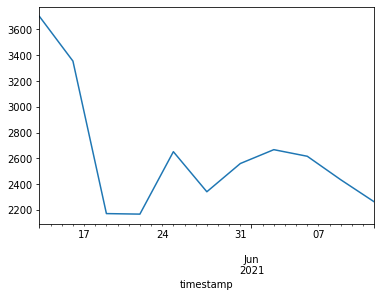

In [152]:
three_day_lowests.plot()

<AxesSubplot:xlabel='timestamp'>

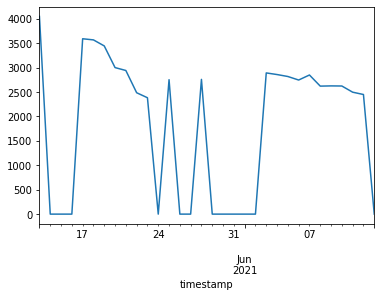

In [153]:
daily_least_highest.plot()

<AxesSubplot:xlabel='timestamp'>

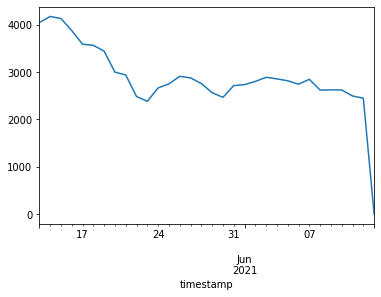

In [154]:
daily_highest.plot()

<AxesSubplot:xlabel='timestamp'>

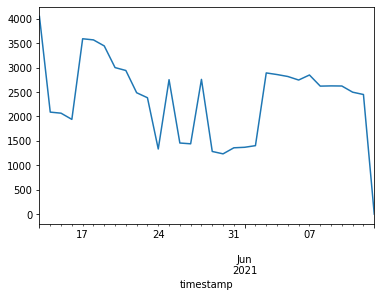

In [155]:
daily_mean.plot()

In [189]:
original_cols = eth_df_2.loc[:,'open':'close'].applymap(lambda x: float(x))

In [190]:
original_cols.fillna(value=0, inplace=True)

In [193]:
original_cols.resample('W').max()

,open,high,low,close
timestamp,,,,
2021-05-16,4094.990000,4174.590000,3701.258493,4079.280000
2021-05-23,3588.290000,3588.290000,3245.651855,3379.649948
2021-05-30,2889.840000,2910.160000,2651.230000,2884.060000
2021-06-06,2856.057688,2889.220875,2667.053463,2852.803506
2021-06-13,2718.680000,2846.796980,2576.207389,2607.626355


In [194]:
original_cols.resample('W').agg({'open': 'mean', 'high': 'max', 'low': 'min', 'close': 'mean'})

,open,high,low,close
timestamp,,,,
2021-05-16,3813.885714,4174.590000,0.00000,2147.780000
2021-05-23,2886.515917,3588.290000,1736.83362,2678.981957
2021-05-30,2512.222739,2910.160000,0.00000,1504.404181
2021-06-06,2634.739965,2889.220875,0.00000,1890.980445
2021-06-13,2520.269898,2846.796980,0.00000,2128.817564
